# AdaBoost 

https://scikit-learn.org/stable/modules/ensemble.html

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. 

In [1]:
# Import the basics 

import pandas as pd
import numpy as np
import sklearn
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import preprocess as pp
import plots

In [2]:
# Read & clean up data

df_raw = pd.read_csv("../data/train.csv")
df = pp.aggregated_preprocess1(df_raw)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(35)

x = df.drop("Survived", axis=1)
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_is_missing,Age_is_missing,Fare_is_missing
0,0,3,2,22.0,1,0,524,7.2500,3,17,1,0,0
1,1,1,1,38.0,1,0,597,71.2833,1,6,0,0,0
2,1,3,1,26.0,0,0,670,7.9250,3,17,1,0,0
3,1,1,1,35.0,1,0,50,53.1000,3,6,0,0,0
4,0,3,2,35.0,0,0,473,8.0500,3,17,1,0,0


In [6]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_is_missing,Age_is_missing,Fare_is_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,0.383838,2.308642,1.647587,28.583244,0.523008,0.381594,339.528620,32.674620,2.529742,14.657688,0.771044,0.198653,0.0
std,0.486592,0.836071,0.477990,13.289500,1.102743,0.806057,200.850657,49.608084,0.800254,4.678254,0.420397,0.399210,0.0
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,1.000000,4.012500,0.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,159.500000,7.925000,2.000000,17.000000,1.000000,0.000000,0.0
50%,0.000000,3.000000,2.000000,25.000000,0.000000,0.000000,338.000000,14.500000,3.000000,17.000000,1.000000,0.000000,0.0
75%,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,520.500000,31.275000,3.000000,17.000000,1.000000,0.000000,0.0
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,681.000000,512.329200,3.000000,17.000000,1.000000,1.000000,0.0


# Model Tuning

- n_estimators: number of weak learners 
- learning_rate: controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. 
- base_estimator: specifies different weak learners 

The main parameters to tune to obtain good results are **n_estimators** and the complexity of the base estimators (e.g., its depth **max_depth** or minimum required number of samples to consider a split **min_samples_split**).



In [10]:
from sklearn.ensemble import AdaBoostClassifier

grid1 = {"n_estimators": np.arange(1, 50, 5), 
         "algorithm": ['SAMME', 'SAMME.R'],
         "learning_rate": [.2, .5, 1, 1.5, 2]}

gs_model1 = GridSearchCV(AdaBoostClassifier(), 
                        param_grid=grid1,
                        cv= 5)

gs_model1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.2, 0.5, 1, 1.5, 2],
                         'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])})

In [12]:
gs_model1.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 46}

In [13]:
best_score = gs_model1.score(x_test, y_test)
best_model = gs_model1

gs_model1.best_score_, best_score

(0.7978331527627303, 0.7653631284916201)

`n_estimators` max was selected for the best model, let's try some higher options for `n_estimators` and see if that changes the better `algorithm` and `learning_rate`

In [16]:

grid2 = {"n_estimators": np.arange(45, 90, 5), 
         "algorithm": ['SAMME', 'SAMME.R'],
         "learning_rate": [ 1, 1.5, 2, 3]}

gs_model2 = GridSearchCV(AdaBoostClassifier(), 
                        param_grid=grid2,
                        cv= 5)

gs_model2.fit(x_train, y_train)

/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 9, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 1.5, 2, 3],
                         'n_estimators': array([45, 50, 55, 60, 65, 70, 75, 80, 85])})

In [17]:
gs_model2.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 80}

In [18]:
gs_model2_score = gs_model2.score(x_test, y_test)
gs_model2.best_score_, gs_model2_score

if gs_model2_score > best_score:
    best_score = gs_model2_score
    best_model = gs_model2


gs_model2.best_score_, gs_model2_score, best_score

(0.8020880527922781, 0.8044692737430168, 0.8044692737430168)

In [19]:
y_preds = gs_model2.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       106
           1       0.76      0.77      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



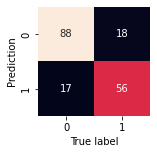

In [21]:
plots.draw_confusion_matrix(y_test, y_preds) 

In [22]:

grid3 = {"n_estimators": [10, 30, 80], 
         "algorithm": ['SAMME', 'SAMME.R'],
         "learning_rate": [ 1, 1.5, 5, 10, 15]}

gs_model3 = GridSearchCV(AdaBoostClassifier(), 
                        param_grid=grid3,
                        cv= 5)

gs_model3.fit(x_train, y_train)

/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 1.5, 5, 10, 15],
                         'n_estimators': [10, 30, 80]})

In [23]:
gs_model3.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 80}

GS 2 gave the best params after all.. 

# Predict the test set & convert to Kaggle

In [24]:
raw_test_df = pd.read_csv("../data/test.csv")
test_PassengerIDs = raw_test_df.PassengerId
test_df = pp.aggregated_preprocess1(raw_test_df)

In [25]:

test_preds = gs_model2.predict(test_df)

In [30]:
kaggle_data = pd.DataFrame()
kaggle_data["PassengerId"] = test_PassengerIDs
kaggle_data["Survived"] = test_preds.astype(int)
len(kaggle_data)

418

In [32]:
best_score_percent = round(best_score, 3)*100
kaggle_data.to_csv("../result-csv/AdaBoost-"+str(best_score_percent)+"p_accuracy.csv", index=False)